<a href="https://colab.research.google.com/github/seunghee-lee/option/blob/main/financial_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Package 설치

In [1]:
!pip install -U finance-datareader
!pip install pandas-datareader
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.1 MB/s eta 0:00:00


In [2]:
!pip install --upgrade yfinance

In [3]:
import FinanceDataReader as fdr
import yfinance as yf
import seaborn as sns
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from datetime import datetime

In [4]:
# Set the start and end date
start_date = '2000-01-01'
end_date = '2025-06-21'

#### 주요 주가지수 분석

In [5]:
kospi = yf.download('^KS11', start_date, end_date)
snp = yf.download('^GSPC',start_date, end_date) #S&P500
nikkei = yf.download('^N225',start_date, end_date) # Nikkei 225
euronext = yf.download('^N100',start_date, end_date) # EURONEXT 100

/tmp/ipython-input-5-3965347332.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  kospi = yf.download('^KS11', start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-5-3965347332.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  snp = yf.download('^GSPC',start_date, end_date) #S&P500
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-5-3965347332.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nikkei = yf.download('^N225',start_date, end_date) # Nikkei 225
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-5-3965347332.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  euronext = yf.download('^N100',start_date, end_date) # EURONEXT 100
[*********************100%***********************]  1 of 1 completed


In [6]:
snp.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


In [7]:
# 지수 자료를 병합
eqt1 = pd.merge(snp['Close'], kospi['Close'],left_index=True, right_index=True, how='inner')
eqt1.columns=['SP500','KOSPI']

eqt2 = pd.merge(nikkei['Close'], euronext['Close'],left_index=True, right_index=True, how='inner')
eqt2.columns=['Nikkei','Euronext']

eqt3 = pd.merge(eqt1, eqt2,left_index=True, right_index=True, how='inner')

In [8]:
eqt3.head()

,SP500,KOSPI,Nikkei,Euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [9]:
rtn= ( np.log(eqt3) - np.log(eqt3.shift(1)) )*100
rtn.columns=['r_sp','r_kp','r_nk','r_ux']
rtn.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


In [10]:
eqt = pd.merge(eqt3,rtn,left_index=True, right_index=True, how='inner')
eqt.head()

,SP500,KOSPI,Nikkei,Euronext,r_sp,r_kp,r_nk,r_ux
Date,,,,,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971,NaN,NaN,NaN,NaN
2000-01-05,1402.109985,986.309998,18542.550781,930.260010,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,1403.449951,960.789978,18168.269531,922.460022,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,1441.469971,948.650024,18193.410156,943.880005,2.672995,-1.271589,0.138281,2.295501
2000-01-11,1438.560059,981.330017,18850.919922,954.059998,-0.202075,3.386886,3.550227,1.072752


In [11]:
pr = eqt[['SP500', 'KOSPI', 'Nikkei','Euronext']]
pr.head()

,SP500,KOSPI,Nikkei,Euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [12]:
rt = eqt[['r_sp','r_kp','r_nk','r_ux']]
rt.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


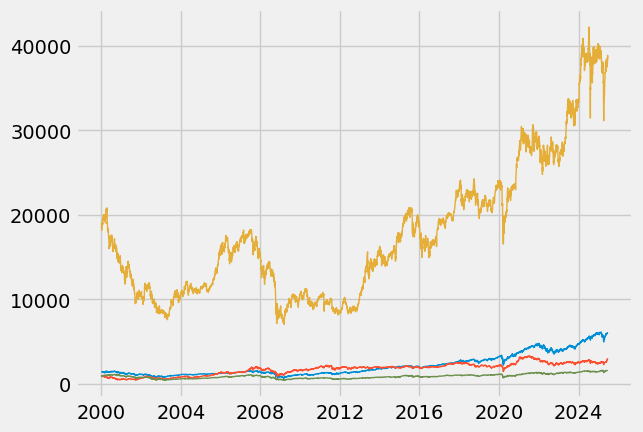

In [13]:
# 원 자료로 그림을 그려 봄
plt.plot(pr, lw='1')

In [15]:
# 초기시점을 0 으로 기준으로 잡고 상대 주가(relative stock price)를 표현
pr_0 = pr / pr.iloc[0] - 1.0

<Axes: xlabel='Date'>

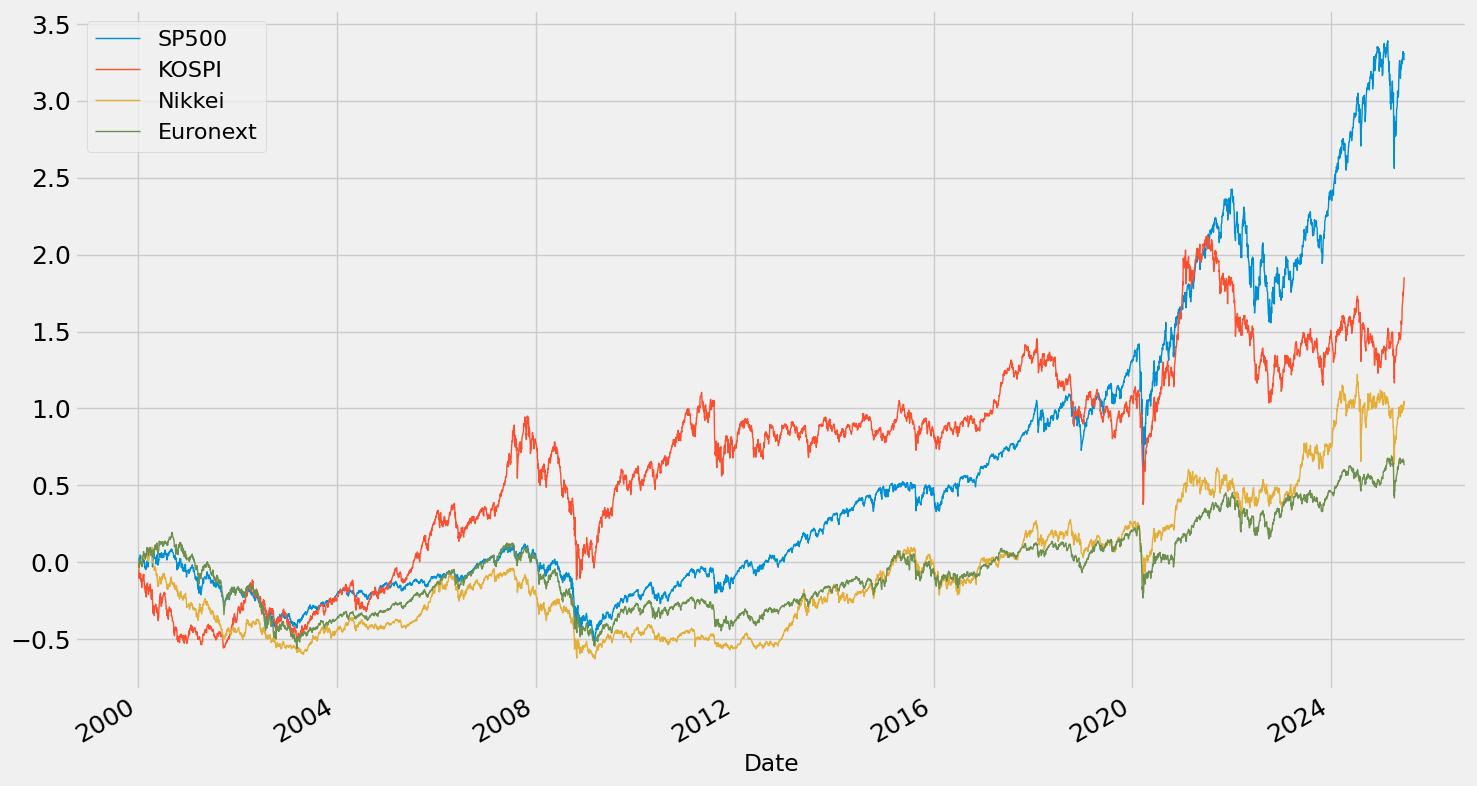

In [16]:
# 상대가격을 그래프로 표현
plt.rcParams['legend.fontsize'] = 16
pr_0.plot( figsize=(16,10), fontsize=18, lw='1')

<Axes: xlabel='Date'>

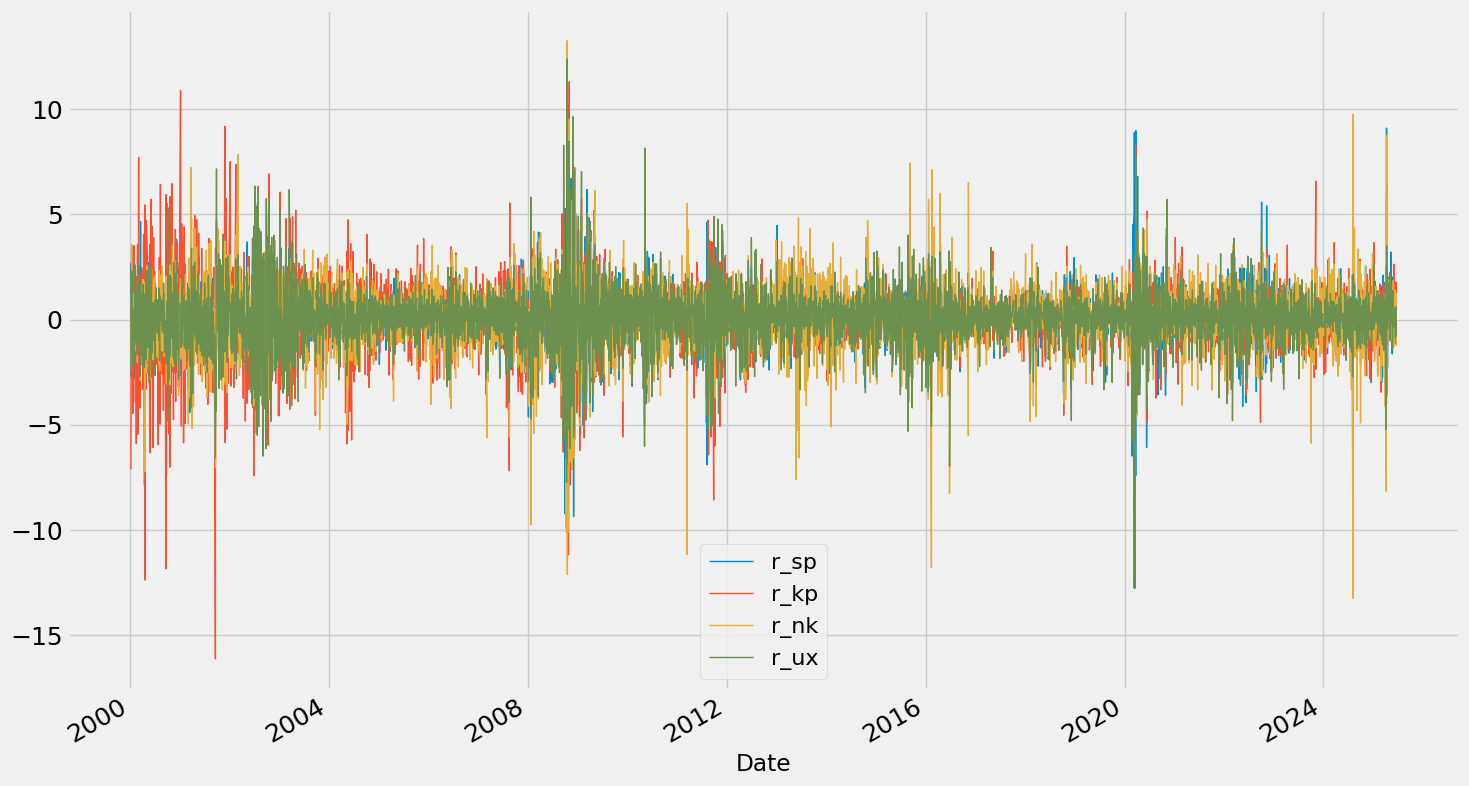

In [17]:
#  수익률 그래프도 표현
plt.rcParams['legend.fontsize'] = 16
rt.plot( figsize=(16,10), lw='1', fontsize=18)

In [18]:
pr.describe()

,SP500,KOSPI,Nikkei,Euronext
count,5713.000000,5713.000000,5713.000000,5713.000000
mean,2171.239277,1774.580581,17626.944588,907.136299
std,1322.562760,686.575066,8056.741264,263.355795
min,676.530029,468.760010,7054.979980,419.950012
25%,1204.420044,1241.469971,10849.389648,690.380005
50%,1502.589966,1938.540039,15914.230469,876.010010
75%,2804.489990,2219.709961,21847.589844,1052.900024
max,6144.149902,3305.209961,42224.019531,1617.060059


In [19]:
rt.describe()

,r_sp,r_kp,r_nk,r_ux
count,5712.000000,5712.000000,5712.000000,5712.000000
mean,0.025391,0.018356,0.012317,0.008562
std,1.288701,1.525953,1.541830,1.345900
min,-12.765220,-16.115370,-13.234076,-12.751740
25%,-0.495523,-0.635158,-0.733815,-0.598081
50%,0.070711,0.071661,0.053701,0.060426
75%,0.613988,0.762418,0.835112,0.661269
max,10.423562,11.284352,13.234592,12.378520


In [20]:
print(rt.describe())
print('skeness: ', rt.skew(axis=0))
print('kurtosis: ', rt.kurtosis(axis=0))

              r_sp         r_kp         r_nk         r_ux
count  5712.000000  5712.000000  5712.000000  5712.000000
mean      0.025391     0.018356     0.012317     0.008562
std       1.288701     1.525953     1.541830     1.345900
min     -12.765220   -16.115370   -13.234076   -12.751740
25%      -0.495523    -0.635158    -0.733815    -0.598081
50%       0.070711     0.071661     0.053701     0.060426
75%       0.613988     0.762418     0.835112     0.661269
max      10.423562    11.284352    13.234592    12.378520
skeness:  r_sp   -0.401015
r_kp   -0.597905
r_nk   -0.473743
r_ux   -0.150962
dtype: float64
kurtosis:  r_sp    9.985789
r_kp    9.046958
r_nk    7.365325
r_ux    7.389693
dtype: float64


In [21]:
# 우리가 원하는 통계량이 모두 포함된 기초통계표를 만들음
df=pr
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              SP500          KOSPI        Nikkei      Euronext
count  5.713000e+03    5713.000000  5.713000e+03   5713.000000
mean   2.171239e+03    1774.580581  1.762694e+04    907.136299
std    1.322563e+03     686.575066  8.056741e+03    263.355795
min    6.765300e+02     468.760010  7.054980e+03    419.950012
25%    1.204420e+03    1241.469971  1.084939e+04    690.380005
50%    1.502590e+03    1938.540039  1.591423e+04    876.010010
75%    2.804490e+03    2219.709961  2.184759e+04   1052.900024
max    6.144150e+03    3305.209961  4.222402e+04   1617.060059
var    1.749172e+06  471385.321808  6.491108e+07  69356.274693
skew   1.237540e+00      -0.221976  1.005666e+00      0.584631
kurt   5.164769e-01      -0.781462  3.280450e-01     -0.318314


In [22]:
df=rt
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              r_sp         r_kp         r_nk         r_ux
count  5712.000000  5712.000000  5712.000000  5712.000000
mean      0.025391     0.018356     0.012317     0.008562
std       1.288701     1.525953     1.541830     1.345900
min     -12.765220   -16.115370   -13.234076   -12.751740
25%      -0.495523    -0.635158    -0.733815    -0.598081
50%       0.070711     0.071661     0.053701     0.060426
75%       0.613988     0.762418     0.835112     0.661269
max      10.423562    11.284352    13.234592    12.378520
var       1.660751     2.328533     2.377239     1.811447
skew     -0.401015    -0.597905    -0.473743    -0.150962
kurt      9.985789     9.046958     7.365325     7.389693


In [23]:
pr.corr()

,SP500,KOSPI,Nikkei,Euronext
SP500,1.000000,0.779157,0.964567,0.908263
KOSPI,0.779157,1.000000,0.717394,0.663177
Nikkei,0.964567,0.717394,1.000000,0.957398
Euronext,0.908263,0.663177,0.957398,1.000000


In [24]:
rt.corr()

,r_sp,r_kp,r_nk,r_ux
r_sp,1.000000,0.228142,0.198339,0.593807
r_kp,0.228142,1.000000,0.611848,0.376930
r_nk,0.198339,0.611848,1.000000,0.401261
r_ux,0.593807,0.376930,0.401261,1.000000


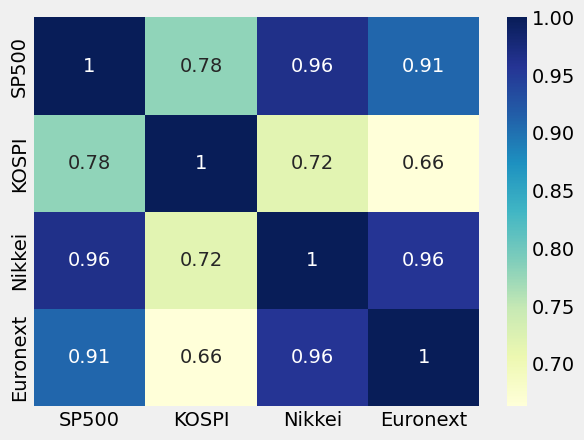

In [25]:
sns.heatmap(pr.corr(), annot=True, cmap="YlGnBu")
plt.show()

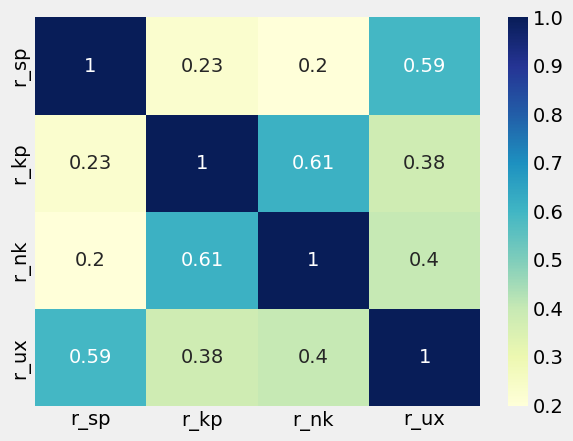

In [26]:
sns.heatmap(rt.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### 회귀 분석

In [27]:
snp = yf.download('^GSPC',start_date, end_date) #S&P500 지수
vix = yf.download('^vix',start_date, end_date) #VIX 지수

/tmp/ipython-input-27-3458128986.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  snp = yf.download('^GSPC',start_date, end_date) #S&P500 지수
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-27-3458128986.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download('^vix',start_date, end_date) #VIX 지수
[*********************100%***********************]  1 of 1 completed


In [28]:
data = pd.merge(snp['Close'], vix['Close'],left_index=True, right_index=True, how='inner')
data.columns=['SP500','VIX']

In [29]:
data.tail()

,SP500,VIX
Date,,
2025-06-13,5976.970215,20.820000
2025-06-16,6033.109863,19.110001
2025-06-17,5982.720215,21.600000
2025-06-18,5980.870117,20.139999
2025-06-20,5967.839844,20.620001


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

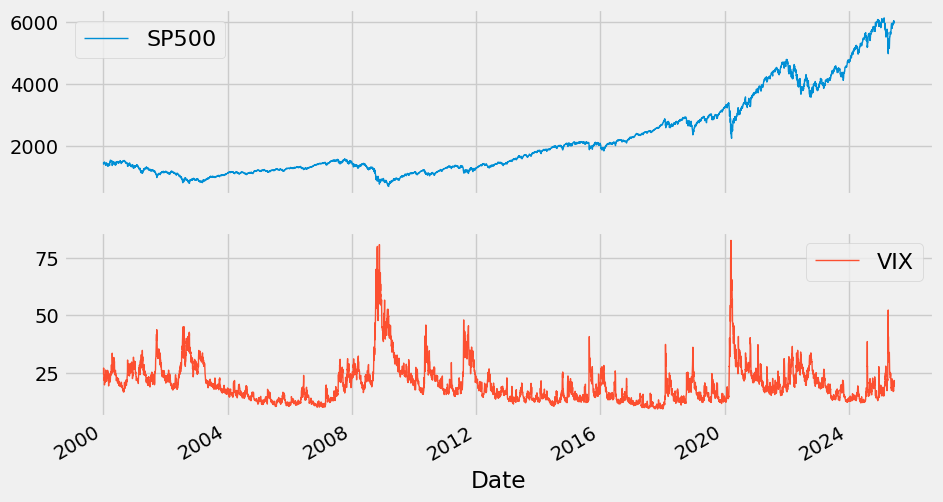

In [30]:
data.plot(subplots=True, figsize=(10, 6), lw='1')

<Axes: xlabel='Date'>

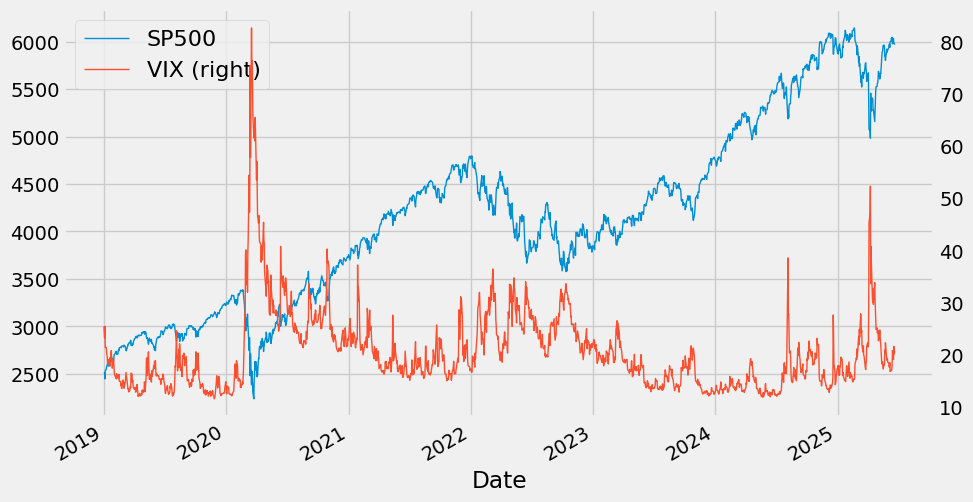

In [31]:
data.loc['2018-12-31':].plot(secondary_y='VIX', figsize=(10, 6), lw='1')

In [32]:
rets = np.log(data / data.shift(1))

In [33]:
rets.head()

,SP500,VIX
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.039099,0.109441
2000-01-05,0.001920,-0.022464
2000-01-06,0.000955,-0.026085
2000-01-07,0.026730,-0.169424


In [34]:
rets.dropna(inplace=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

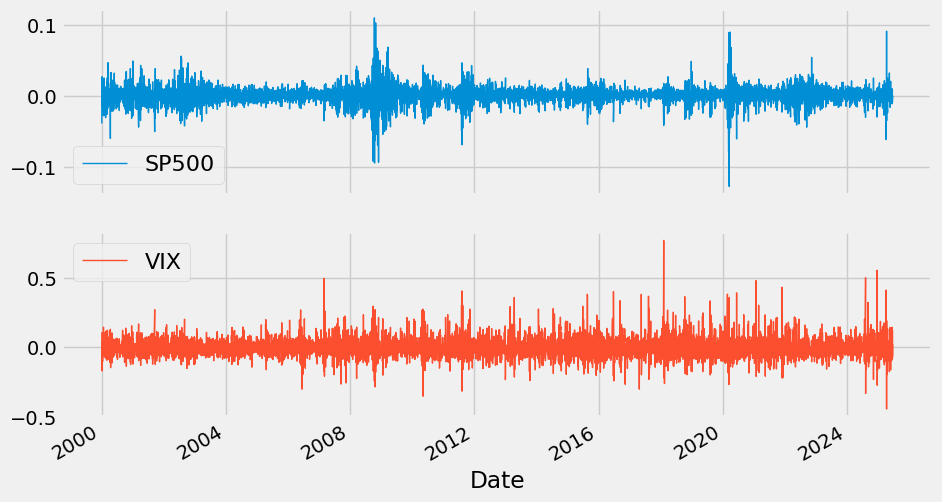

In [35]:
rets.plot(subplots=True, figsize=(10, 6), lw='1')

array([[<Axes: xlabel='SP500', ylabel='SP500'>,
        <Axes: xlabel='VIX', ylabel='SP500'>],
       [<Axes: xlabel='SP500', ylabel='VIX'>,
        <Axes: xlabel='VIX', ylabel='VIX'>]], dtype=object)

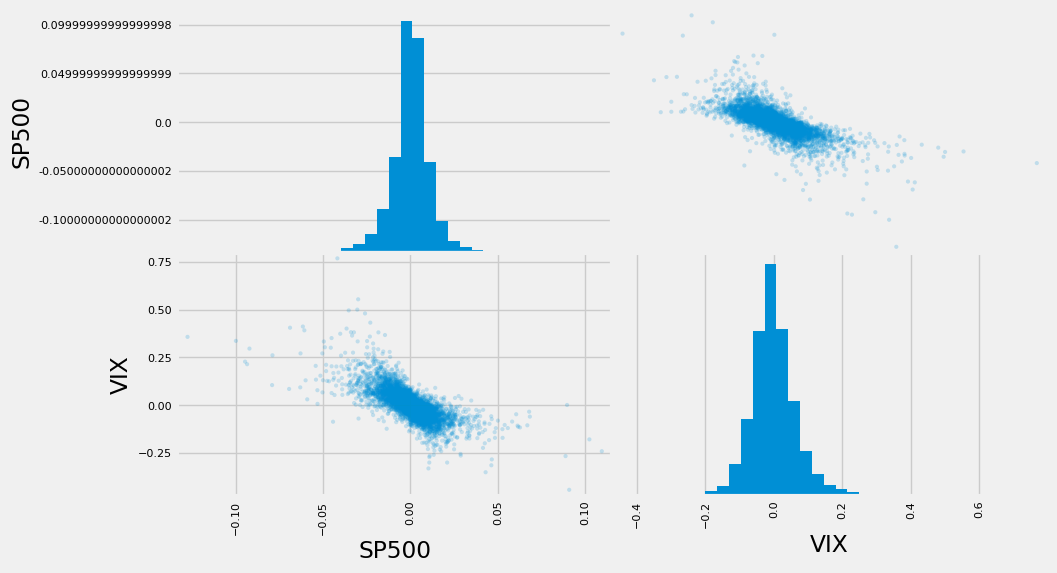

In [36]:
pd.plotting.scatter_matrix(rets,
                           alpha=0.2,
                           diagonal='hist',
                           hist_kwds={'bins': 35},
                           figsize=(10, 6))

In [37]:
reg = np.polyfit(rets['SP500'], rets['VIX'], deg=1)

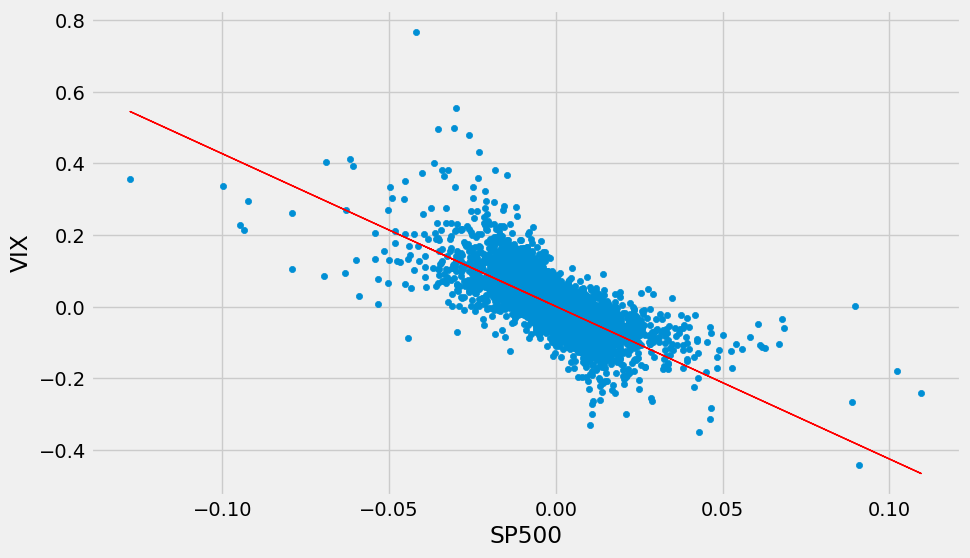

In [38]:
ax = rets.plot(kind='scatter', x='SP500', y='VIX', figsize=(10, 6))
ax.plot(rets['SP500'], np.polyval(reg, rets['SP500']), 'r', lw='1')

In [39]:
rets.corr()

,SP500,VIX
SP500,1.000000,-0.732111
VIX,-0.732111,1.000000


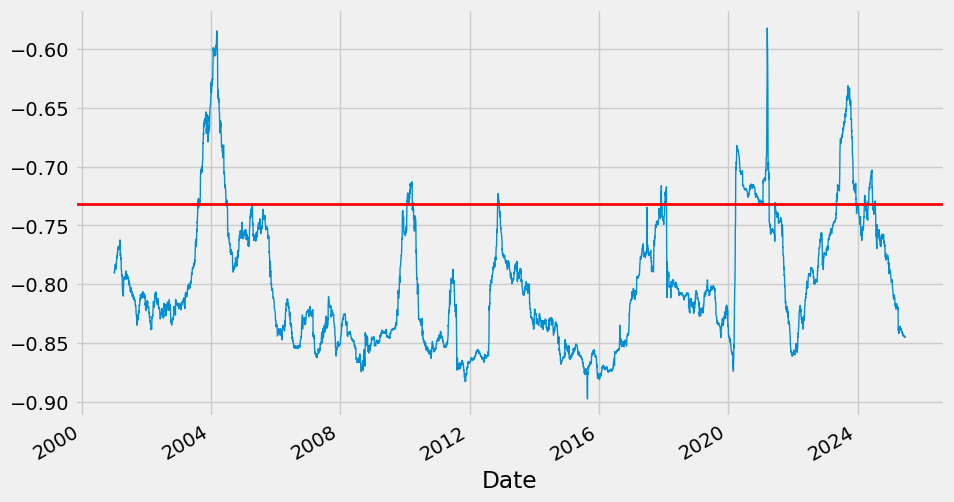

In [40]:
ax = rets['SP500'].rolling(window=252).corr(
                  rets['VIX']).plot(figsize=(10, 6), lw='1')
ax.axhline(rets.corr().iloc[0, 1], c='r', lw='2')